<a href="https://colab.research.google.com/github/AzhagurajaR/Hello-world/blob/main/Axis_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

[MOVING AVERAGE ANALYSIS](https://towardsdatascience.com/moving-averages-in-python-16170e20f6c)

In [2]:
axis = pd.read_excel('axis.xlsx', index_col=0)
bank_nifty = pd.read_excel('bank_nifty.xlsx', index_col=0)

In [ ]:
axis.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-14 15:30:00,491.00,497.45,489.75,491.75,3983656
2017-08-16 15:30:00,492.95,501.55,488.00,499.50,5958229
2017-08-17 15:30:00,500.20,503.45,495.00,497.15,3948664
2017-08-18 15:30:00,495.30,495.95,489.85,490.40,4166976
2017-08-21 15:30:00,492.10,503.40,491.80,494.80,17884400


In [ ]:
axis.shape

(836, 5)

In [ ]:
axis.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
print(type(axis.index[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
axis['high-low'] = axis['High'] - axis['Low'] # HIGH - LOW 
axis['Open-Close'] = axis['Open'] - axis['Close'] # OPEN - CLOSE
axis['%volatile'] = (axis['Open-Close'] / axis['high-low']) * 100

## SIMPLE MOVING AVERAGE
Simple moving average is **unweighted mean** of previous M data points.

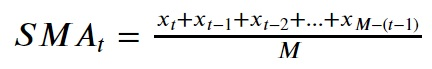

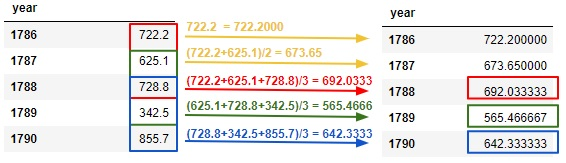

In [12]:
axis['SMA_5'] = axis['Close'].rolling(window=5, min_periods=1).mean() # Simple Moving average method using rolling with window 5

## **CUMULATIVE MOVING AVERAGE**
Cumulative moving average is the **unweighted mean** of the previous values upto the current time t.

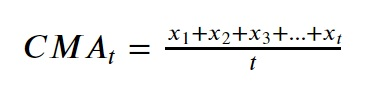

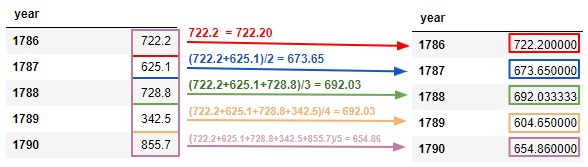

In [ ]:
axis['CMA'] = axis['Close'].expanding().mean() # Cumulative Moving average method

## EXPOENTIAL MOVING AVERAGE
The expoential moving average is widely to filter out noise and identify the trend. the weight of the each elment decreases progressively over time, meaning the potential moving average gives greater weight to the recent data points. This is done under the idea that the recent data is more relevant than older data.

Compared to the Simple moving average, the exponential moving average reacts to faster to change, since this is more sensitive to recent movements.

### **adjust = False**, execute the below formula

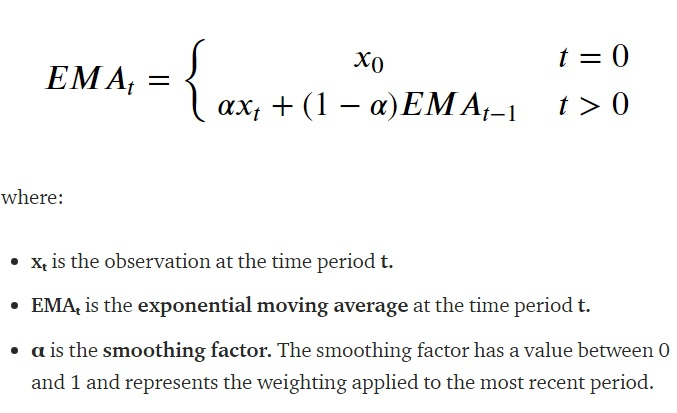

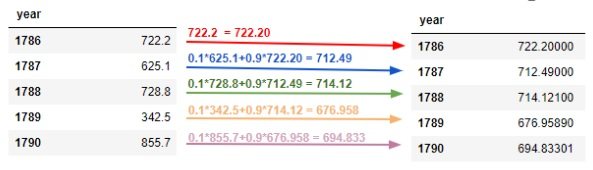

In [7]:
axis['EMA'] = axis['Close'].ewm(span=40,adjust=False).mean() # Exponential moving average with adjust = Flase

### **adjust = True**, executes below formula

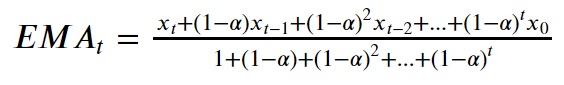

In [22]:
axis['EMA_True'] = axis['Close'].ewm(alpha=0.25,adjust=True).mean() # Exponential moving average with adjust = True

[Day's closing   --   Day closing of its previous day] (Subtracting day's closing to it's previous day's closing)

In [9]:
diff = [0]
for i, j in zip(axis['Close'][:-1], axis['Close'][1:]):
    s = i - j
    diff.append(s)
diff_dict = {'diff': diff}
diff_ = pd.DataFrame(diff_dict, index=axis.index)

In [ ]:
diff_.head()

,diff
Date,
2017-08-14 15:30:00,0.00
2017-08-16 15:30:00,-7.75
2017-08-17 15:30:00,2.35
2017-08-18 15:30:00,6.75
2017-08-21 15:30:00,-4.40


In [ ]:
len(diff_)

836

In [10]:
axis['Diff_closing'] = diff_

In [20]:
axis.head()

,Open,High,Low,Close,Volume,high-low,Open-Close,%volatile,SMA_5,CMA,EMA,Diff_closing,EMA_True
Date,,,,,,,,,,,,,
2017-08-14 15:30:00,491.00,497.45,489.75,491.75,3983656,7.70,-0.75,-9.740260,491.750000,491.750000,491.750000,0.00,491.750000
2017-08-16 15:30:00,492.95,501.55,488.00,499.50,5958229,13.55,-6.55,-48.339483,495.625000,495.625000,492.128049,-7.75,495.721875
2017-08-17 15:30:00,500.20,503.45,495.00,497.15,3948664,8.45,3.05,36.094675,496.133333,496.133333,492.373022,2.35,496.221912
2017-08-18 15:30:00,495.30,495.95,489.85,490.40,4166976,6.10,4.90,80.327869,494.700000,494.700000,492.276777,6.75,494.655500
2017-08-21 15:30:00,492.10,503.40,491.80,494.80,17884400,11.60,-2.70,-23.275862,494.720000,494.720000,492.399861,-4.40,494.687361


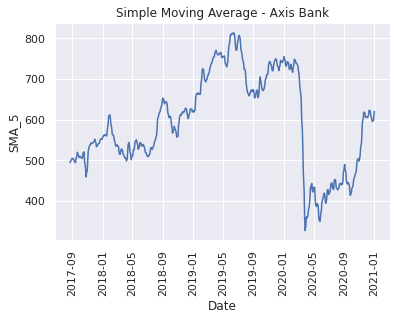

In [4]:
sns.lineplot(x=axis.index, y='SMA_5', data=axis);
plt.title('Simple Moving Average - Axis Bank');
plt.xticks(rotation=90);

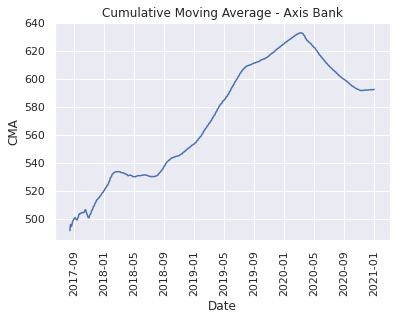

In [5]:
sns.lineplot(x=axis.index, y='CMA', data=axis);
plt.title('Cumulative Moving Average - Axis Bank');
plt.xticks(rotation=90);

(array([736573., 736695., 736815., 736938., 737060., 737180., 737303.,
        737425., 737546., 737669., 737791.]),
 <a list of 11 Text major ticklabel objects>)

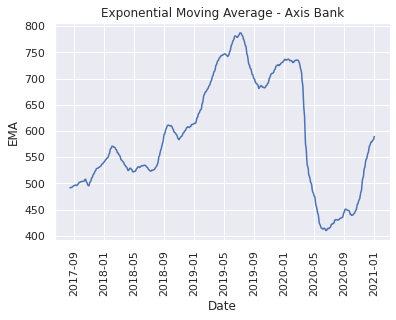

In [8]:
sns.lineplot(x=axis.index, y='EMA', data=axis);
plt.title('Exponential Moving Average - Axis Bank')
plt.xticks(rotation=90)

(array([736573., 736695., 736815., 736938., 737060., 737180., 737303.,
        737425., 737546., 737669., 737791.]),
 <a list of 11 Text major ticklabel objects>)

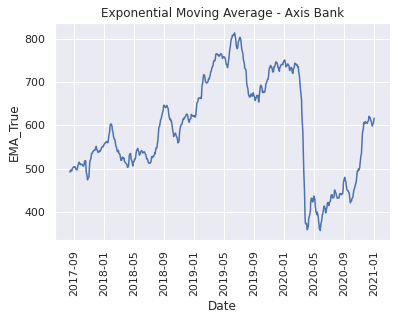

In [24]:
sns.lineplot(x=axis.index, y='EMA_True', data=axis);
plt.title('Exponential Moving Average - Axis Bank');
plt.xticks(rotation=90);

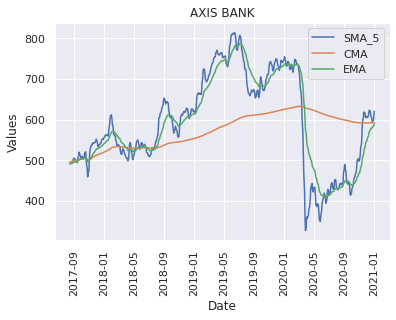

In [25]:
sns.lineplot(x=axis.index, y='SMA_5', data=axis);
sns.lineplot(x=axis.index, y='CMA', data=axis);
sns.lineplot(x=axis.index, y='EMA', data=axis);
#sns.lineplot(x=axis.index, y='EMA_True', data=axis);
plt.title('AXIS BANK');
plt.ylabel('Values');
plt.xticks(rotation=90);
plt.legend(labels=['SMA_5', 'CMA', 'EMA']);

In [ ]:
axis.to_excel('axis_new.xlsx')

In [ ]:
axis_ = axis[axis['%volatile'] > 50]

In [ ]:
axis_.to_excel('axis>50.xlsx')